In [1]:
import fermi.tipsh as tipsh
from fermi.skymap import imshow_mollweide, imshow_mollweide_multiple, imshow_multiple
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mmappickle.dict import mmapdict
from scipy.ndimage import gaussian_filter
import numpy
import math
import fermi.rl as rl
import time
import datetime

In [2]:
energies = ['100-200mev', '200-500mev', '500-1000mev', '1-2gev', '2-5gev', '5-10gev', '10-20gev', '20-50gev', '50-100gev', '100-200gev', '200-500gev', '500-1000gev']
fits_root = 'fits_files'
date = '2022-01-18'
fwer = 'uniform'
alpha = 1e-3
mode = 'wavelet'
now = datetime.date.today()

In [3]:
linthresh = {'100-200mev': 1e0,
        '200-500mev': 1e0,
        '500-1000mev': 1e-1,
        '1-2gev': 1e-1,
        '2-5gev': 1e-1,
        '5-10gev': 1e-2,
        '10-20gev': 1e-2,
        '20-50gev': 1e-3,
        '50-100gev': 5e-4,
        '100-200gev': 5e-4,
        '200-500gev': 5e-4,
        '500-1000gev': 5e-5,}

In [4]:
counts = mmapdict('counts.mmdpickle')
counts.vacuum()
point_models = mmapdict('point_models.mmdpickle')
point_models.vacuum()
diffuse_models = mmapdict('diffuse_models.mmdpickle')
diffuse_models.vacuum()
galactic_models = mmapdict('galactic_models.mmdpickle')
galactic_models.vacuum()
galactic_v02_models = mmapdict('galactic_v02_models.mmdpickle')
galactic_v02_models.vacuum()
isotropic_models = mmapdict('isotropic_models.mmdpickle')
isotropic_models.vacuum()
total_models = mmapdict('total_models_v02_unmodified.mmdpickle')
total_models.vacuum()
count_residuals = mmapdict('count_residuals.mmdpickle')
count_residuals.vacuum()

In [20]:
total_models['100-200mev'] = 1.0*point_models['100-200mev'] + 1.0*diffuse_models['100-200mev'] + \
                                0.9*galactic_v02_models['100-200mev'] + 1.0*isotropic_models['100-200mev']
total_models['200-500mev'] = 1.0*point_models['200-500mev'] + 1.0*diffuse_models['200-500mev'] + \
                                0.9*galactic_v02_models['200-500mev'] + 1.0*isotropic_models['200-500mev']
total_models['500-1000mev'] = 1.0*point_models['500-1000mev'] + 1.0*diffuse_models['500-1000mev'] + \
                                0.925*galactic_v02_models['500-1000mev'] + 1.0*isotropic_models['500-1000mev']
total_models['1-2gev'] = 1.0*point_models['1-2gev'] + 1.0*diffuse_models['1-2gev'] + \
                                0.9*galactic_v02_models['1-2gev'] + 1.0*isotropic_models['1-2gev']
total_models['2-5gev'] = 1.0*point_models['2-5gev'] + 1.0*diffuse_models['2-5gev'] + \
                                0.8*galactic_v02_models['2-5gev'] + 1.0*isotropic_models['2-5gev']
total_models['5-10gev'] = 1.0*point_models['5-10gev'] + 1.0*diffuse_models['5-10gev'] + \
                                0.85*galactic_v02_models['5-10gev'] + 1.0*isotropic_models['5-10gev']
total_models['10-20gev'] = 1.0*point_models['10-20gev'] + 1.0*diffuse_models['10-20gev'] + \
                                0.85*galactic_v02_models['10-20gev'] + 1.0*isotropic_models['10-20gev']
total_models['20-50gev'] = 1.0*point_models['20-50gev'] + 1.0*diffuse_models['20-50gev'] + \
                                0.75*galactic_v02_models['20-50gev'] + 1.0*isotropic_models['20-50gev']
total_models['50-100gev'] = 1.0*point_models['50-100gev'] + 1.0*diffuse_models['50-100gev'] + \
                                0.6*galactic_v02_models['50-100gev'] + 1.0*isotropic_models['50-100gev']
total_models['100-200gev'] = 1.0*point_models['100-200gev'] + 1.0*diffuse_models['100-200gev'] + \
                                0.35*galactic_v02_models['100-200gev'] + 1.0*isotropic_models['100-200gev']
total_models['200-500gev'] = 1.0*point_models['200-500gev'] + 1.0*diffuse_models['200-500gev'] + \
                                0.3*galactic_v02_models['200-500gev'] + 1.0*isotropic_models['200-500gev']
total_models['500-1000gev'] = 1.0*point_models['500-1000gev'] + 1.0*diffuse_models['500-1000gev'] + \
                                0.3*galactic_v02_models['500-1000gev'] + 1.0*isotropic_models['500-1000gev']
total_models.vacuum()

In [6]:
total_models['100-200mev'] = 1.0*point_models['100-200mev'] + 1.0*diffuse_models['100-200mev'] + \
                                1.0*galactic_v02_models['100-200mev'] + 1.0*isotropic_models['100-200mev']
total_models['200-500mev'] = 1.0*point_models['200-500mev'] + 1.0*diffuse_models['200-500mev'] + \
                                1.0*galactic_v02_models['200-500mev'] + 1.0*isotropic_models['200-500mev']
total_models['500-1000mev'] = 1.0*point_models['500-1000mev'] + 1.0*diffuse_models['500-1000mev'] + \
                                1.0*galactic_v02_models['500-1000mev'] + 1.0*isotropic_models['500-1000mev']
total_models['1-2gev'] = 1.0*point_models['1-2gev'] + 1.0*diffuse_models['1-2gev'] + \
                                1.0*galactic_v02_models['1-2gev'] + 1.0*isotropic_models['1-2gev']
total_models['2-5gev'] = 1.0*point_models['2-5gev'] + 1.0*diffuse_models['2-5gev'] + \
                                1.0*galactic_v02_models['2-5gev'] + 1.0*isotropic_models['2-5gev']
total_models['5-10gev'] = 1.0*point_models['5-10gev'] + 1.0*diffuse_models['5-10gev'] + \
                                1.0*galactic_v02_models['5-10gev'] + 1.0*isotropic_models['5-10gev']
total_models['10-20gev'] = 1.0*point_models['10-20gev'] + 1.0*diffuse_models['10-20gev'] + \
                                1.0*galactic_v02_models['10-20gev'] + 1.0*isotropic_models['10-20gev']
total_models['20-50gev'] = 1.0*point_models['20-50gev'] + 1.0*diffuse_models['20-50gev'] + \
                                1.0*galactic_v02_models['20-50gev'] + 1.0*isotropic_models['20-50gev']
total_models['50-100gev'] = 1.0*point_models['50-100gev'] + 1.0*diffuse_models['50-100gev'] + \
                                1.0*galactic_v02_models['50-100gev'] + 1.0*isotropic_models['50-100gev']
total_models['100-200gev'] = 1.0*point_models['100-200gev'] + 1.0*diffuse_models['100-200gev'] + \
                                1.0*galactic_v02_models['100-200gev'] + 1.0*isotropic_models['100-200gev']
total_models['200-500gev'] = 1.0*point_models['200-500gev'] + 1.0*diffuse_models['200-500gev'] + \
                                1.0*galactic_v02_models['200-500gev'] + 1.0*isotropic_models['200-500gev']
total_models['500-1000gev'] = 1.0*point_models['500-1000gev'] + 1.0*diffuse_models['500-1000gev'] + \
                                1.0*galactic_v02_models['500-1000gev'] + 1.0*isotropic_models['500-1000gev']
total_models.vacuum()

In [7]:
#sigma = 8.45
sigma = 20
for energy in energies:
    count_residuals[energy] = gaussian_filter(counts[energy] - total_models[energy], sigma)
count_residuals.vacuum()

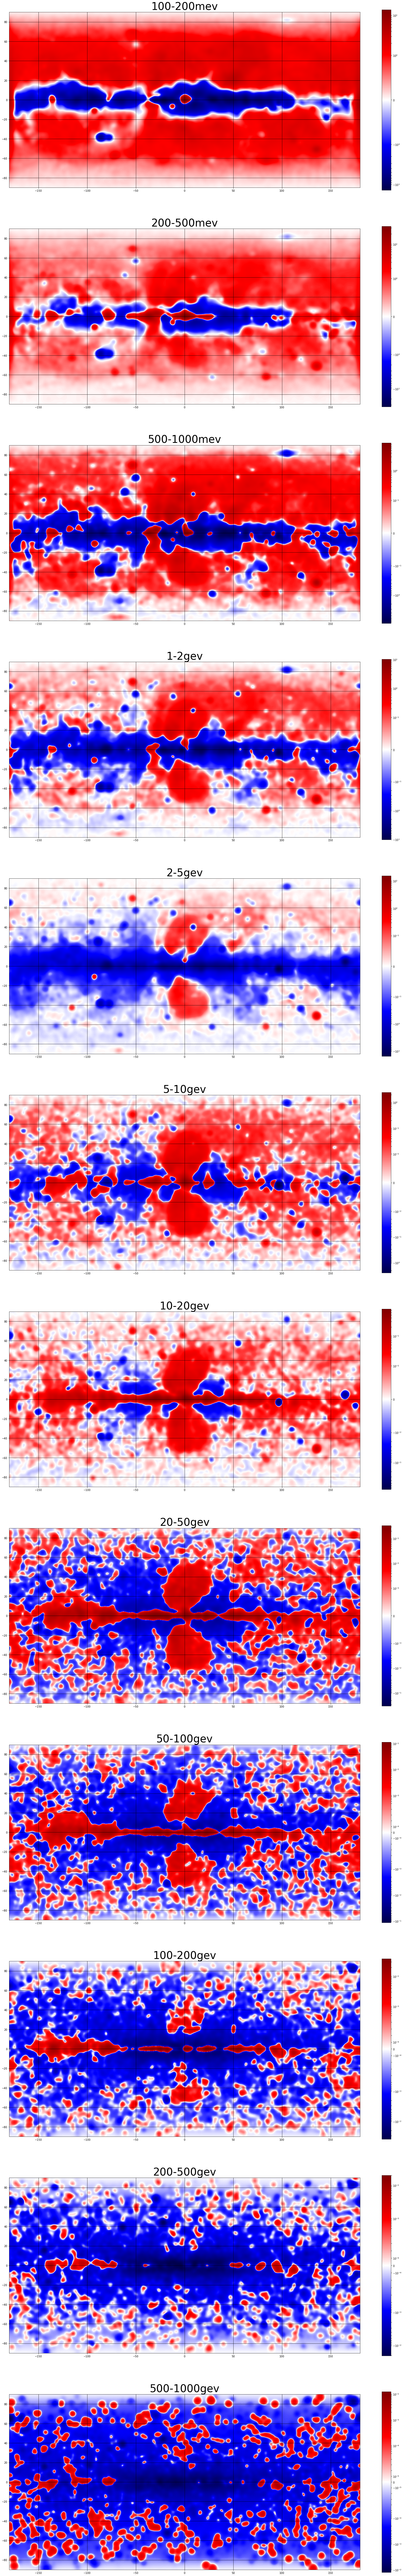

In [8]:
imshow_multiple(count_residuals, energies, plt.cm.seismic, linthresh=linthresh)

In [10]:
for energy in energies:
    data_file = get_pkg_data_filename(f"{fits_root}/lat_source_zmax90_{energy}_ccube.fits")
    point_model_file = get_pkg_data_filename(f"{fits_root}/{energy}_source_point_model_map.fits")
    diffuse_model_file = get_pkg_data_filename(f"{fits_root}/{energy}_source_diffuse_model_map.fits")
    galactic_model_file = get_pkg_data_filename(f"{fits_root}/{energy}_source_galactic_model_map.fits")
    galactic_v02_model_file = get_pkg_data_filename(f"{fits_root}/{energy}_source_galactic_v02_model_map.fits")
    isotropic_model_file = get_pkg_data_filename(f"{fits_root}/{energy}_source_isotropic_model_map.fits")

    count_cube = fits.getdata(data_file, ext=0)
    count_data = count_cube[0]
    point_model = fits.getdata(point_model_file, ext=0)
    diffuse_model = fits.getdata(diffuse_model_file, ext=0)
    galactic_model = fits.getdata(galactic_model_file, ext=0)
    galactic_v02_model = fits.getdata(galactic_v02_model_file, ext=0)
    isotropic_model = fits.getdata(isotropic_model_file, ext=0)
    
    counts[energy] = count_data
    point_models[energy] = point_model
    diffuse_models[energy] = diffuse_model
    galactic_models[energy] = galactic_model
    galactic_v02_models[energy] = galactic_v02_model
    isotropic_models[energy] = isotropic_model
    
    del count_cube, count_data, point_model, diffuse_model, galactic_model, galactic_v02_model, isotropic_model